In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Observations: With the head() , i'm able to fetch the top 5 records here and see the information.

--Input Features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

--Output Features: Number of predicted wins(W)

In [3]:
df.shape

(30, 17)

Observation: we can check our dataset having 30 number of rows and 17 number of columns

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Observation: here, we are checking, what are the columns present in our datset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Observation: Here, we are checking the information about the dataset.i.e., Is there any null value present in the dataset And, what is the data type of each column. There is float64(1) and int64(16) no. of columns.

In [6]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation: There is no null values present in dataset

In [7]:
df.duplicated(subset=None,keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

Observation: Here we are checking for the duplicates present in our dataset. And found that there in no any duplicate

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation: Here, we are checking, how the data is distributed. And, we have found some observation here.

-- There is no any null values present in dataset
-- There is no object data type feature present in the dataset
-- All features/columns having numerical values.
-- we are observaing that the standard deviation is very very less with respect to mean, which is good.
-- if we are looking into the mean, we have found that, there is no any features having minimum=0
-- And , if we are looking into the min, 25%, 50%, 75% and max. we have found that the difference between them is not too big. But still there is some skewness present in the dataset. We need some more proof to observe the skewness in the data and for that we will plot the distplot. 

# Exploratory Data Analysis:

checking the distribution of the continuous values of integer and float type columns:

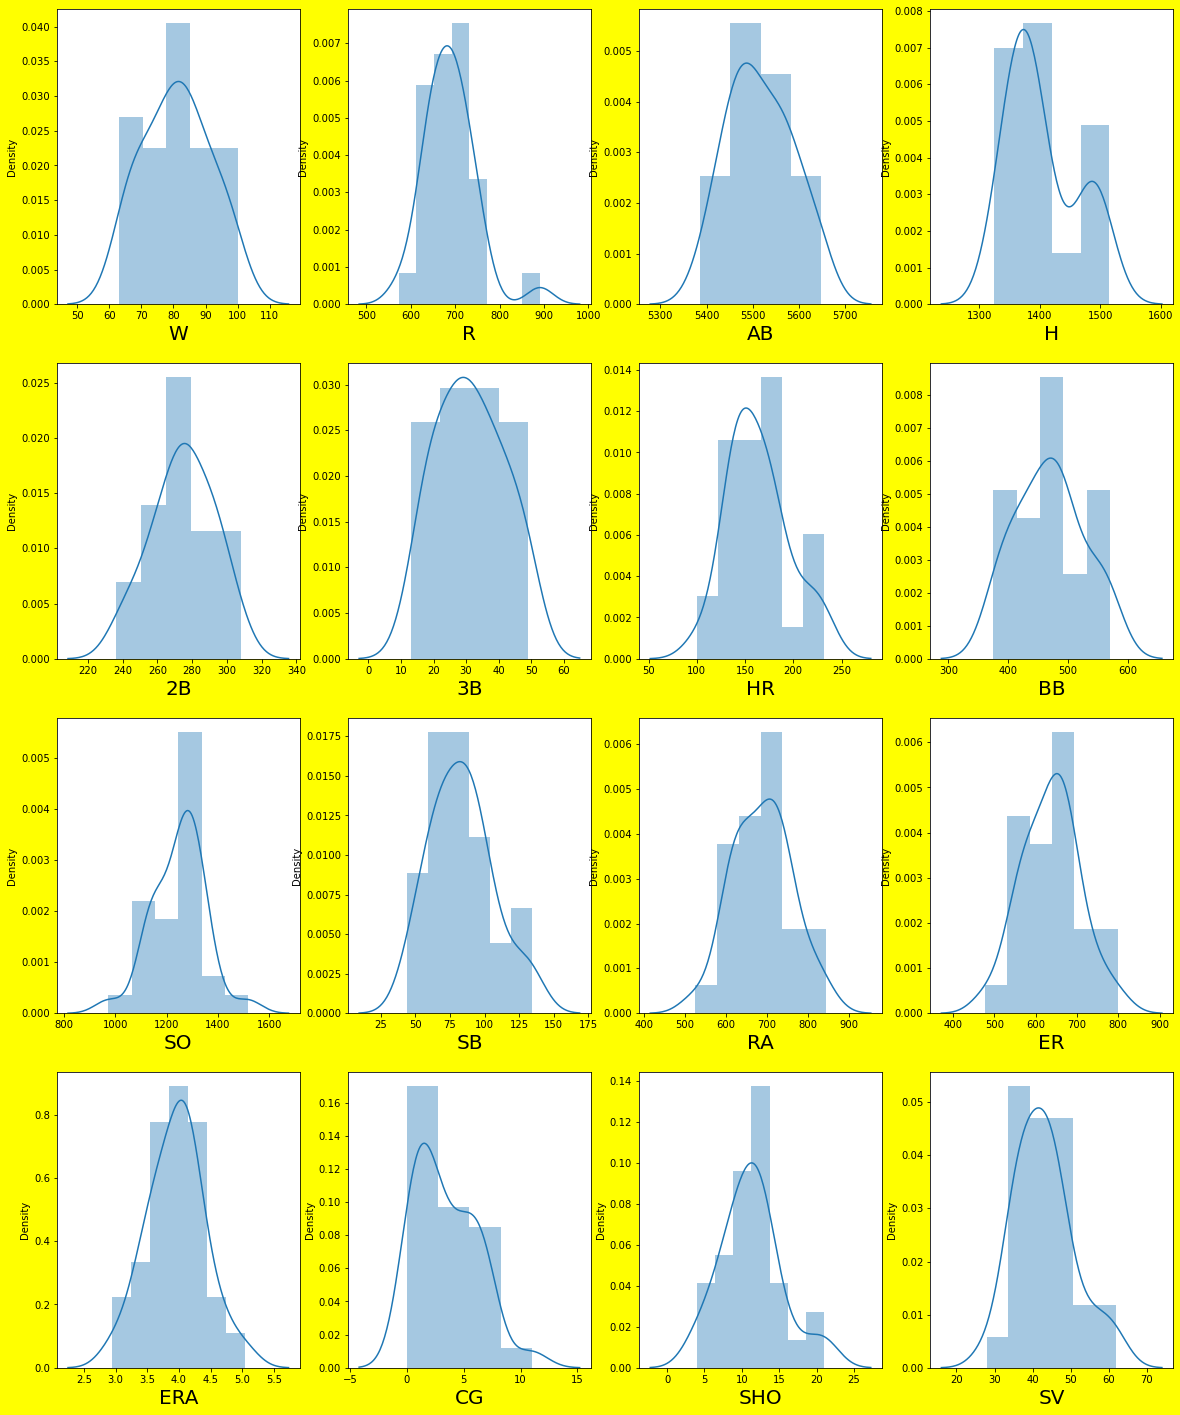

In [9]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()

Observation: It's almost looking good distribution.

# Plotting the Heatmap:

<AxesSubplot:>

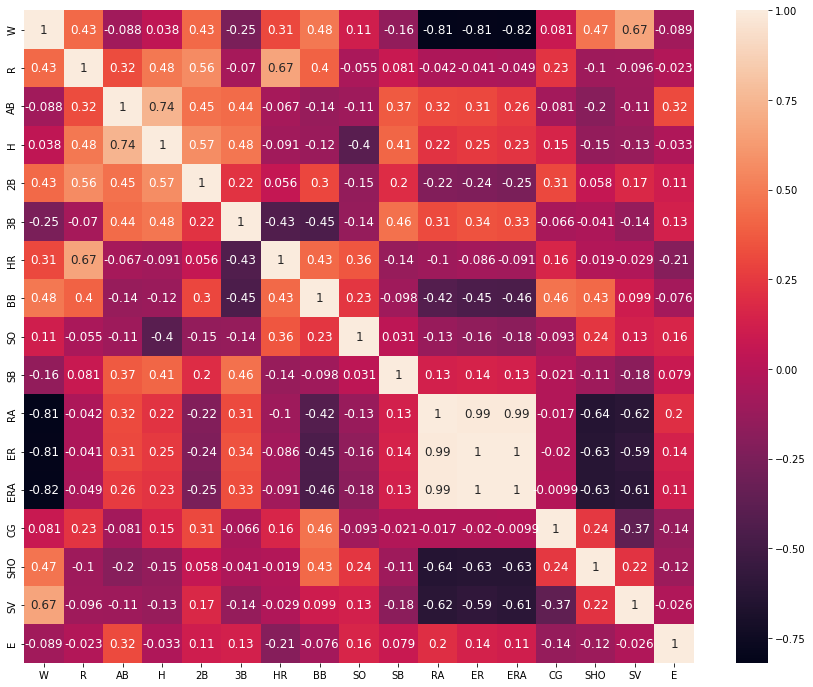

In [10]:
df_corr=df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})

Observation: with the help of heatmap(),we are trying to see the corelation co-efficient with feature to feature as well as feature to label variable

here, are the following points on what we haveve observed:

1. RA(Run Allowed),ER(Earned Runs),ERA(Earned Run Average) columns are highly correlated with each other. These columns are highly negatively correlated with the label W(wins) columns that means there is high impact of these columns in Winnings.

2. Now, the question comes, why are we gonna include all these columns , if these columns have the same impact on the target variable i.e., W(wins).SO we are going to drop columns here.

3. Again, the question comes, which feature we going to drop. So, whichever feature having comparitively less correlation with the target variable that is going to be drop.

4. We are dropping two columns [ER,RA] and keepin ERA(Earned Runs Average) from them because they have same kind of effect on W(wins) , won't effect the prediction model if are adding them.

In [11]:
df.drop(['ER','RA'],axis=1,inplace=True)

In [12]:
df.shape

(30, 15)

Observation: After dropping two columns we are left with 15 columns in dataset

<AxesSubplot:>

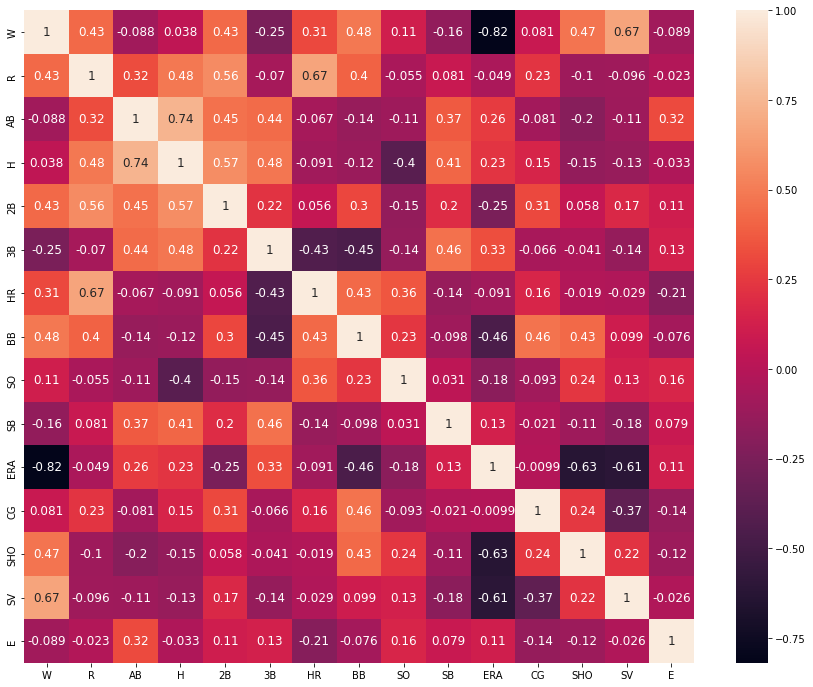

In [13]:
df_corr=df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})

Observation: 

1. we have ERA left in data which is neagtively correlated with target variable W(wins).

2. we can see here data is not that much correlated with wins(w).

3. SV(Saves),SHO(Shutouts),BB(walks),2B(doubles) and R(runs) columns seems fairly correlated with wins(W) that would help for prediction.

4. Also can be noticed ERA is correlaed with the SV and SHO columns.

# Plotting the scatterplot:

# checking the relationship between feature variable ERA(Earned Run Average) and target variable W(Wins)

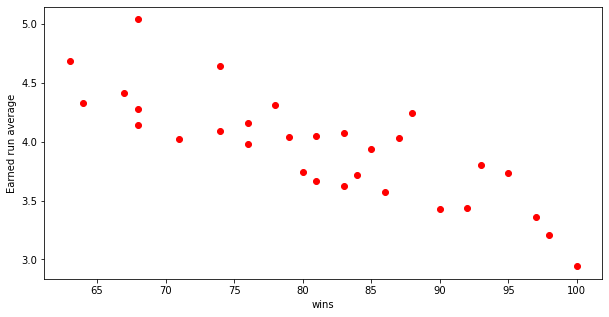

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['ERA'],c='Red')
plt.xlabel('wins')
plt.ylabel('Earned run average')
plt.show()

Observation:  
   1. We can see here we have less Earned Run Average in there we have more wins matches.
   2. In 65 to 88 wins we have average 4 to 5 runs
   3. In 90 to 100 wins we can see we have average of 3 to 4 runs


Conclusion for this Observation:

This could be the reason of aggressive play, whenever player playing aggressively can make more runs, but there is also high chances to be out quickly that could be the reson we have less no of wins where Earned run average is high.

# checking the relationship between feature variable SV(Saves) and target variable W(Wins)

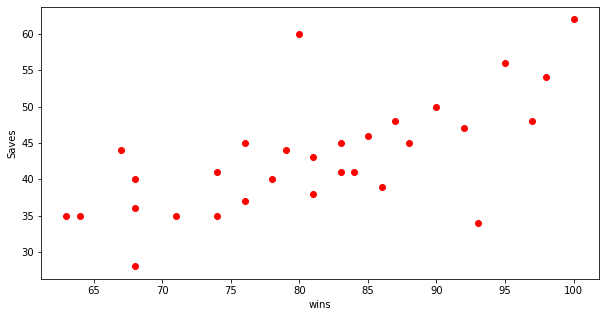

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['SV'],c='Red')
plt.xlabel('wins')
plt.ylabel('Saves')
plt.show()

Obseravtion: here, we can see that as and when saves runs increases,chances of winning also increasing. Hence this SV(saves) feature variable having high impact on target variable W(wins)

# checking the relationship between feature variable SHO(Shutouts) and target variable W(Wins)

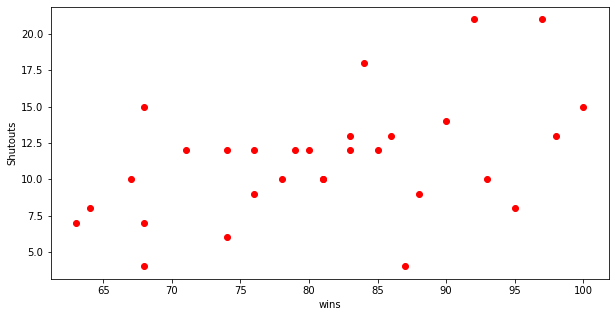

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['SHO'],c='Red')
plt.xlabel('wins')
plt.ylabel('Shutouts')
plt.show()

Obseravtion: Shutouts having little effect on winnings. In some of the data when the shoutouts increasing, chances of winnings also high.

# checking the relationship between feature variable BB(walks) and target variable W(Wins)

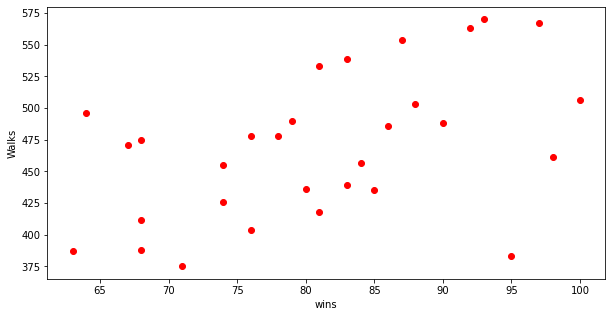

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['BB'],c='Red')
plt.xlabel('wins')
plt.ylabel('Walks')
plt.show()

Obseravtion: Here we can clearly see the pattern between BB(Walks) and W(wins). As and when BB(Walks) increasing , chances of winning also increasing. Hence, this feature BB(Walks) varible having impact on target W(wins) variable.

# checking the relationship between feature variable 2B(Doubles) and target variable W(Wins)

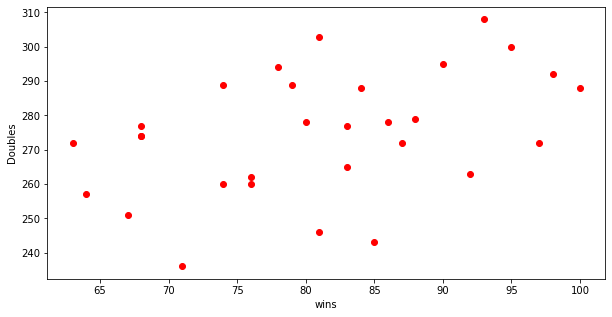

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['2B'],c='Red')
plt.xlabel('wins')
plt.ylabel('Doubles')
plt.show()

Observation: we can clearly see the patterns in most of the data points.As and when Doubles in a match is high then there is high chances of winning the match. Hence this feature 2B(Doubles) having impact on target W(wins).

# checking the relationship between feature variable R(Runs) and target variable W(Wins)

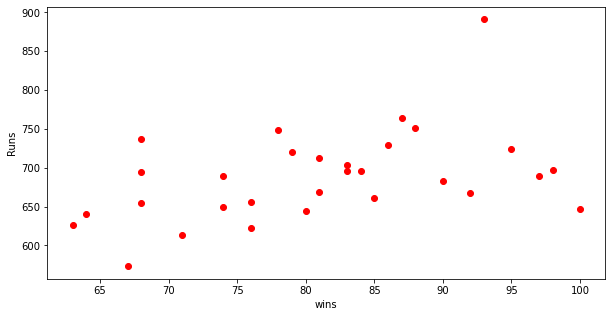

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df['W'],df['R'],c='Red')
plt.xlabel('wins')
plt.ylabel('Runs')
plt.show()

Observation: we can observe here, this feature R(Runs) not having that much of impact on Target variable W(wins). Most of the runs are in the range of 600 - 800 in all winnings percentage. and some of the outliers data also present here.

# Outliers handling:

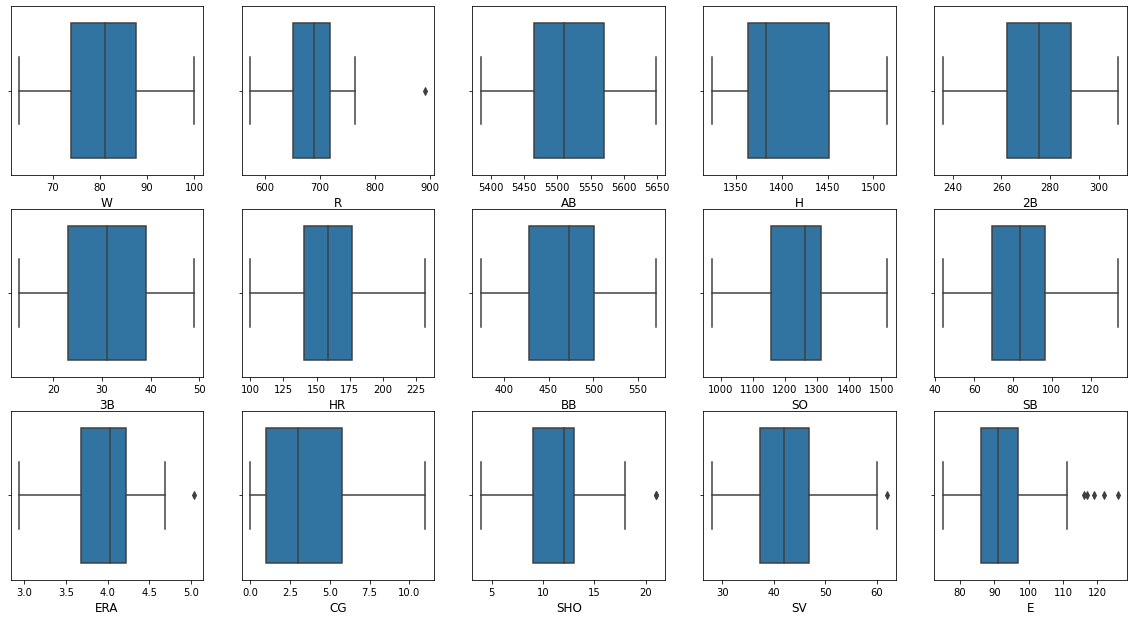

In [21]:
plt.figure(figsize=(20,18))
graph=1

for column in df:
    if graph<=16:
        plt.subplot(5,5,graph)
        ax=sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
        
        graph+=1
plt.show()

Observation: we can see here, there are 5 columns which are having outliers.i.e., columns are [R,ERA,SHO,SV,E].Now there are several method to deal with these outliers. we will go one by one to handle this.

# Z-SCORE method:

In [22]:
from scipy import stats

In [23]:
from scipy.stats import zscore

In [24]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [26]:
df1=df[(z<3).all(axis=1)]

In [27]:
df1.shape

(29, 15)

In [28]:
print("with Outliers", df.shape)
print("without outliers",df1.shape)

with Outliers (30, 15)
without outliers (29, 15)


Observation: with the help of zscore method , we are able to reduce 1 row

there is another method IQR to handle the outliers

In [29]:
IQR = stats.iqr(df) 
IQR 

614.25

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [31]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(30, 15)


Obserbation: there is no outliers present in this IQR method which is quite logical because of the less data present in our dataset

Hence, we are taking zscore method into the consideration.And we are not going for the outliers handling anymore as our dataset is too small and We are not in a position to loose any more data here

In [32]:
df=df1

In [33]:
df.shape

(29, 15)

# Spliting the data:

In [34]:
x=df.drop(['W'],axis=1)
y=df['W']

# Skewness handling:

In [35]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Observation: 
--skewness more than +/- 0.5 will treated
--we can see here there are some data skewed in column[H,CG,SHO,SV,E]
--here we are going for the removal of skewness in tha columns whichever having skewness +/- 0.5. And here the columns [H,CG,SHO,CV,E]

In [36]:
from sklearn.preprocessing import power_transform

x[['H', 'CG', 'SHO', 'SV', 'E']]=power_transform(x[['H', 'CG', 'SHO', 'SV', 'E']],method='yeo-johnson')

In [37]:
x.skew()

R     -0.215364
AB     0.169573
H      0.000000
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Obseravtion: we have successfully removed the skewness from the columns as we can see that.

# Standardization of data:

In [57]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Observation: here we are standardized the data. so, my model will not going to treat any data points on priority note. That's why we are scaling the data and model will each data point equally

# checking for null:

In [58]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

Observation: there is no any null values in our scalling data. we are good to go

# Describe the data:

In [59]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,29.000000,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.566709,0.498171,0.0,0.560988,0.522031,0.471353,0.471983,0.511104,0.437165,0.486535,0.462820,0.496773,0.545151,0.508101
std,0.237471,0.271595,0.0,0.257760,0.285448,0.227698,0.285046,0.190697,0.257811,0.219594,0.271806,0.244940,0.222023,0.276493
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403141,0.295455,0.0,0.388060,0.361111,0.307692,0.265625,0.341284,0.277778,0.347619,0.230279,0.373171,0.400262,0.361169
50%,0.607330,0.477273,0.0,0.567164,0.527778,0.430769,0.500000,0.533945,0.433333,0.519048,0.495369,0.553751,0.556566,0.508619
75%,0.732984,0.704545,0.0,0.776119,0.722222,0.592308,0.630208,0.622018,0.588889,0.619048,0.668644,0.609418,0.666996,0.612261
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Obseravtion: we can clearly see here, all our data points have been scaled

# Spliting the dataset into training and testing:

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is:-{r2_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.9730947151496028
At random state 0, The test accuracy is:-0.48032436332395256
At random state 1, The training accuracy is:-0.961045232311694
At random state 1, The test accuracy is:-0.689188473344791
At random state 2, The training accuracy is:-0.9402440879067483
At random state 2, The test accuracy is:-0.29564333498131845
At random state 3, The training accuracy is:-0.9636459278075227
At random state 3, The test accuracy is:-0.6179134916773958
At random state 4, The training accuracy is:-0.9590949693496182
At random state 4, The test accuracy is:-0.7969421076715502
At random state 5, The training accuracy is:-0.9551231963874857
At random state 5, The test accuracy is:-0.5366289297854434
At random state 6, The training accuracy is:-0.9601627847931741
At random state 6, The test accuracy is:-0.7440770072577905
At random state 7, The training accuracy is:-0.9464230467928701
At random state 7, The test accuracy is:-0.8327718370224056
At rando

Observation: At random state 99 giving highest accuracy. so we are choosing that as random state

splitting the data:

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [70]:
x_train.shape

(22, 14)

In [71]:
y_train.shape

(22,)

In [72]:
x_test.shape

(7, 14)

In [73]:
y_test.shape

(7,)

Observation: spliting the data into 75% training and 25% testing at random state 99, which is giving the highest accuracy

# Model Building:

# Linear Regression:

In [74]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9411713529485164


In [86]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))
cross_Val = cross_val_score(LR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 12.672633550148293
MAE: 3.2741362790608792
r2_score: 0.8977213310275126
Cross validation -2.9628436731437042


# Ridge:

In [76]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.7900161919802784


In [108]:
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))
cross_Val = cross_val_score(R,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MAE: 6.200545498380066
r2_score: -0.7668782142053749
Cross validation -3.1130943042841293


# SVR:

In [78]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.30528092031070986


In [89]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))
cross_Val = cross_val_score(svr,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 92.33046990756982
MAE: 8.297178483476788
r2_score: -15.403272063076397
Cross validation -4.004212027076063


# RandomForestRegressor:

In [80]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9451760367246529


In [90]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))
cross_Val = cross_val_score(RF,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 57.097642857142866
MAE: 6.910000000000001
r2_score: -0.5123470103710235
Cross validation -7.487131953371508


# Decision Tree Regressor:

In [82]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [91]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))
cross_Val = cross_val_score(DTR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 79.42857142857143
MAE: 8.0
r2_score: -1.278688524590164
Cross validation -13.496013224167308


# Gradient Boost Regressor:

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9999999858489446


In [92]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))
cross_Val = cross_val_score(GBR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 59.731689249240574
MAE: 6.850552595548775
r2_score: -0.33700198840532547
Cross validation -11.611173522246306


 According to all metrics score we are selecting LinearRegression model is best suited model for this dataset. As difference between r2 score and cross validation score is minimum comparitively to all models. Hence, we are good to go with Linear Regression model

# Hyperparameter Tuning:

# GridSearchCV:

In [93]:
from sklearn.model_selection import GridSearchCV

In [96]:
LR=LinearRegression()
param_grid={
     'fit_intercept':[True,False],
    'copy_X':[True],
    'n_jobs':[-1],
   'positive' : [True],
}

In [97]:
gridsearch=GridSearchCV(estimator=LR,param_grid=param_grid)

In [98]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True, False],
                         'n_jobs': [-1], 'positive': [True]})

In [99]:
gridsearch.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}

In [100]:
LR=gridsearch.best_estimator_
LR.fit(x_train,y_train)

LinearRegression(n_jobs=-1, positive=True)

In [101]:
LR_Pred=LR.predict(x_test)

In [102]:
LR_Pred

array([76.45621352, 65.09807686, 95.08772745, 84.24426739, 83.10533837,
       92.65600567, 82.13923134])

In [109]:
print('MSE:',mean_squared_error(LR_Pred,y_test))
print('MAE:',mean_absolute_error(LR_Pred,y_test))
print('r2_score:',r2_score(LR_Pred,y_test))
cross_Val = cross_val_score(LR,x,y,cv=10)
print("Cross validation",cross_Val.mean())

MSE: 25.82765799660196
MAE: 3.761849001736331
r2_score: 0.7007977209358387
Cross validation -4.75690998922572


<AxesSubplot:xlabel='W', ylabel='Density'>

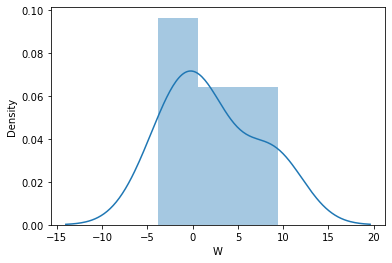

In [104]:
sns.distplot(LR_Pred-y_test)

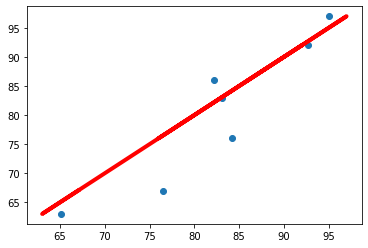

In [107]:
plt.scatter(LR_Pred,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the model:

In [110]:
import pickle
filename='Baseball.pkl'
pickle.dump(LR,open(filename,'wb'))

# Conclusion:

In [112]:
loaded_model=pickle.load(open('Baseball.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

80.96336880515199
